# Heart Disease Prediction 

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

Attribute Information
1. age
2. sex
    1 = male
0 = female
3. chest pain type (4 values.
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
4. resting blood pressure
5. serum cholestoral in mg/dl
6.fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
        - Value 0: normal
        - Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        - Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
8. thalach-maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
        - Value 1: upsloping
        - Value 2: flat
        - Value 3: downsloping
12. number of major vessels (0-3. colored by flourosopy
13. thal: A blood disorder called thalassemia 
Value 0: NULL (dropped from the dataset previously
Value 1: fixed defect (no blood flow in some part of the heart)
Value 2: normal blood flow
Value 3: reversible defect (a blood flow is observed but it is not normal)
14. target: 0= less chance of heart attack 1= more chance of heart attack
    - diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing

#### Import Libraries

In [1]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)

#### Read and Inspect data 

In [3]:
heart=pd.read_csv('heart.csv')

In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


categorical columns
sex
cp
fbs
restecg
exang
slope
ca
thal

In [7]:
#binning age groups
heart.age=pd.cut(heart.age,[0,40,50,60,70,80],labels=['<40','40-50','50-60','60-70','70-80'])

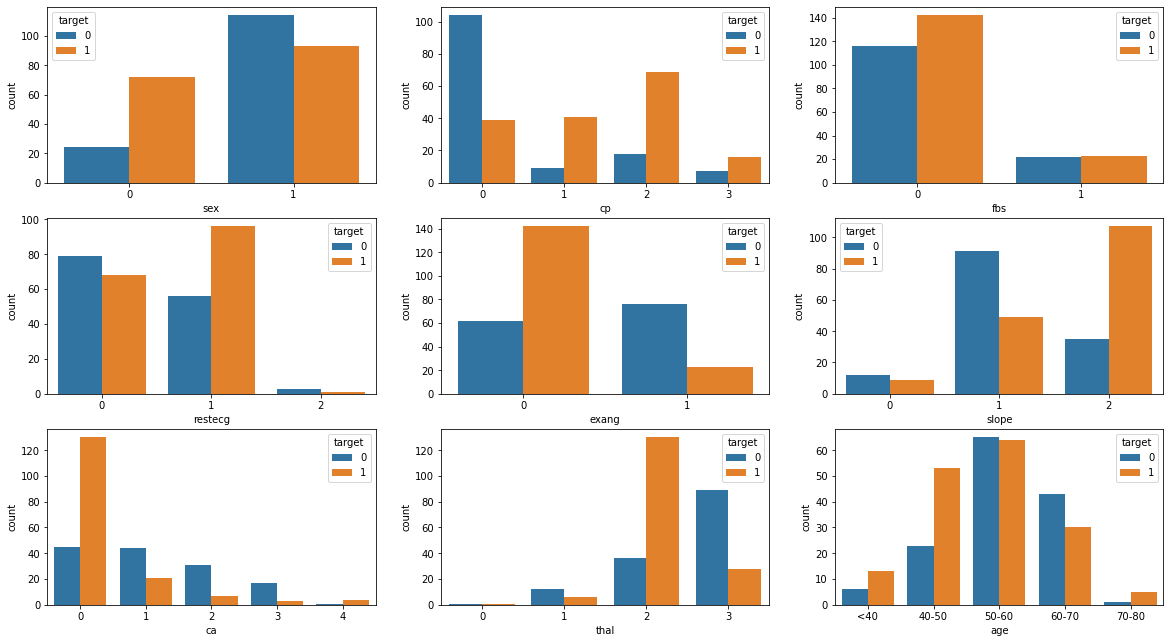

In [8]:
plt.figure(figsize=[20,11])
plt.subplot(3,3,1)
sns.countplot(x=heart.sex,hue=heart.target)

plt.subplot(3,3,2)
sns.countplot(x=heart.cp,hue=heart.target)

plt.subplot(3,3,3)
sns.countplot(x=heart.fbs,hue=heart.target)

plt.subplot(3,3,4)
sns.countplot(x=heart.restecg,hue=heart.target)

plt.subplot(3,3,5)
sns.countplot(x=heart.exang,hue=heart.target)

plt.subplot(3,3,6)
sns.countplot(x=heart.slope,hue=heart.target)

plt.subplot(3,3,7)
sns.countplot(x=heart.ca,hue=heart.target)

plt.subplot(3,3,8)
sns.countplot(x=heart.thal,hue=heart.target)

plt.subplot(3,3,9)
sns.countplot(x=heart.age,hue=heart.target)


plt.show()

<div class="alert alert-block alert-info">

**OBSERVATION:**
    

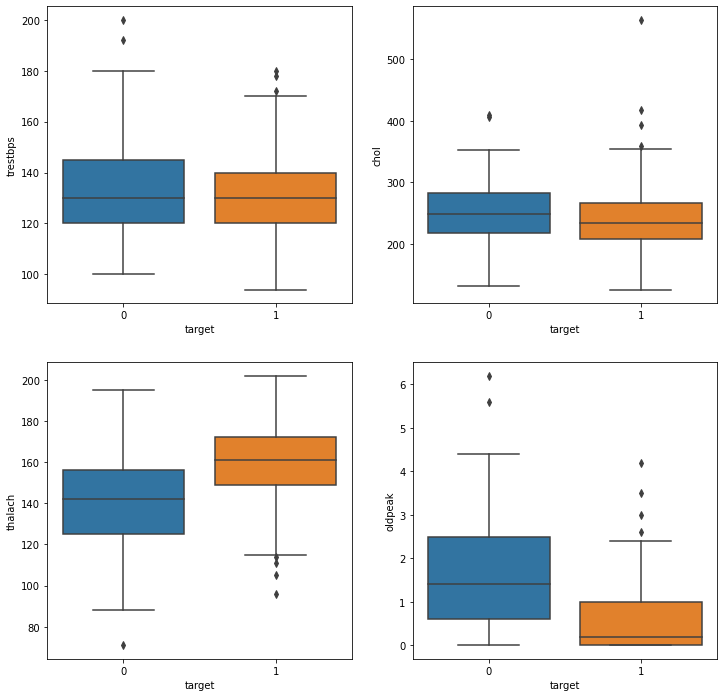

In [9]:
#Plotting numerical columns
plt.figure(figsize=[12,12])

#1. Age vs Target


#2. trestbps vs Target
plt.subplot(2,2,1)
sns.boxplot(x=heart.target, y=heart.trestbps)

#3. Chol vs Target
plt.subplot(2,2,2)
sns.boxplot(x=heart.target, y=heart.chol)

#4. thalach vs Target
plt.subplot(2,2,3)
sns.boxplot(x=heart.target, y=heart.thalach)

#5. oldpeak vs Target
plt.subplot(2,2,4)
sns.boxplot(x=heart.target, y=heart.oldpeak)

plt.show()

In [10]:
# plt.figure(figsize=[15,7])

# plt.subplot(2,3,1)
# sns.distplot(heart.age,)

# plt.subplot(2,3,2)
# sns.distplot(heart.trestbps)

# plt.subplot(2,3,3)
# sns.distplot(heart.chol)

# plt.subplot(2,3,4)
# sns.distplot(heart.thalach)

# plt.subplot(2,3,5)
# sns.distplot(heart.oldpeak)

# plt.show()

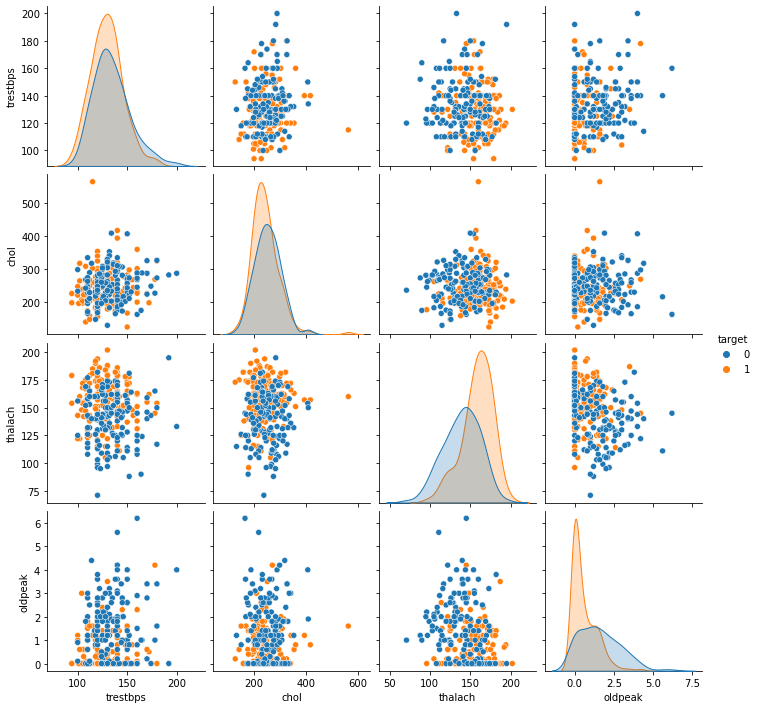

In [11]:
sns.pairplot(heart,x_vars=['trestbps','chol','thalach','oldpeak'],
             y_vars=['trestbps','chol','thalach','oldpeak'],
             diag_kind='kde',hue='target')
plt.show()

In [12]:
# sns.boxplot(x=heart.age,y=heart.chol,hue=heart.target)
# plt.show()

In [13]:
# sns.boxplot(x=heart.age,y=heart.thalach,hue=heart.target)
# plt.show()

In [14]:
# sns.boxplot(x=heart.age,y=heart.trestbps,hue=heart.target)
# plt.show()

In [15]:
# sns.boxplot(x=heart.age,y=heart.oldpeak,hue=heart.target)
# plt.show()

In [16]:
# sns.boxplot(x=heart.age,y=heart.oldpeak,hue=heart.sex)
# plt.show()

In [17]:
#replacing the values in the categorical column with their attribute description
heart.cp=heart.cp.replace([0,1,2,3,],['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
heart.restecg=heart.restecg.replace([0,1,2],['normal', 'Value1', 'Value2'])
heart.slope=heart.slope.replace([0,1,2],['upsloping', 'flat', 'downsloping'])
heart.thal=heart.thal.replace([0,1,2,3],['NA', 'fixed defect', 'normal', 'reversible defect'])
#converting 'ca' to string type as it is categorical
heart.ca=heart.ca.astype(str)

#### Creating Dummy Variables 

In [18]:
#One Hot Encoding
d=pd.get_dummies(heart[['age','cp','restecg','slope','ca','thal']],drop_first=True)

In [19]:
#merging with the base dataset
heart=pd.concat([heart,d],axis=1)

In [20]:
#drop the variables for which one hot encoding has been done
heart=heart.drop(['age','cp','restecg','slope','ca','thal'], axis=1)

In [21]:
heart.head()

,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,age_40-50,age_50-60,age_60-70,age_70-80,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_Value2,restecg_normal,slope_flat,slope_upsloping,ca_1,ca_2,ca_3,ca_4,thal_fixed defect,thal_normal,thal_reversible defect
0,1,145,233,1,150,0,2.3,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
1,1,130,250,0,187,0,3.5,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,0,130,204,0,172,0,1.4,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,1,120,236,0,178,0,0.8,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,120,354,0,163,1,0.6,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


#### Train_test split

In [22]:
#import train_test split from sklearn
from sklearn.model_selection import train_test_split

In [23]:
X=heart.drop('target',axis=1)
y=heart.target

X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [24]:
#import MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [25]:
#scaling numerical variables using MinMax Scaler
X_train[['trestbps','chol','thalach','oldpeak']]= scaler.fit_transform(X_train[['trestbps','chol','thalach','oldpeak']])

In [26]:
X_train.describe()

,sex,trestbps,chol,fbs,thalach,exang,oldpeak,age_40-50,age_50-60,age_60-70,age_70-80,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_Value2,restecg_normal,slope_flat,slope_upsloping,ca_1,ca_2,ca_3,ca_4,thal_fixed defect,thal_normal,thal_reversible defect
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,0.674528,0.379910,0.404968,0.132075,0.599633,0.316038,0.163344,0.264151,0.438679,0.221698,0.023585,0.169811,0.273585,0.452830,0.004717,0.495283,0.462264,0.061321,0.245283,0.122642,0.047170,0.018868,0.056604,0.556604,0.382075
std,0.469660,0.173715,0.167272,0.339374,0.173217,0.466028,0.188035,0.441924,0.497400,0.416372,0.152111,0.376356,0.446854,0.498948,0.068680,0.501161,0.499754,0.240486,0.431273,0.328802,0.212504,0.136381,0.231631,0.497962,0.487045
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.265306,0.286713,0.000000,0.507634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.367347,0.391608,0.000000,0.622137,0.000000,0.096774,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.469388,0.500874,0.000000,0.725191,1.000000,0.245968,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


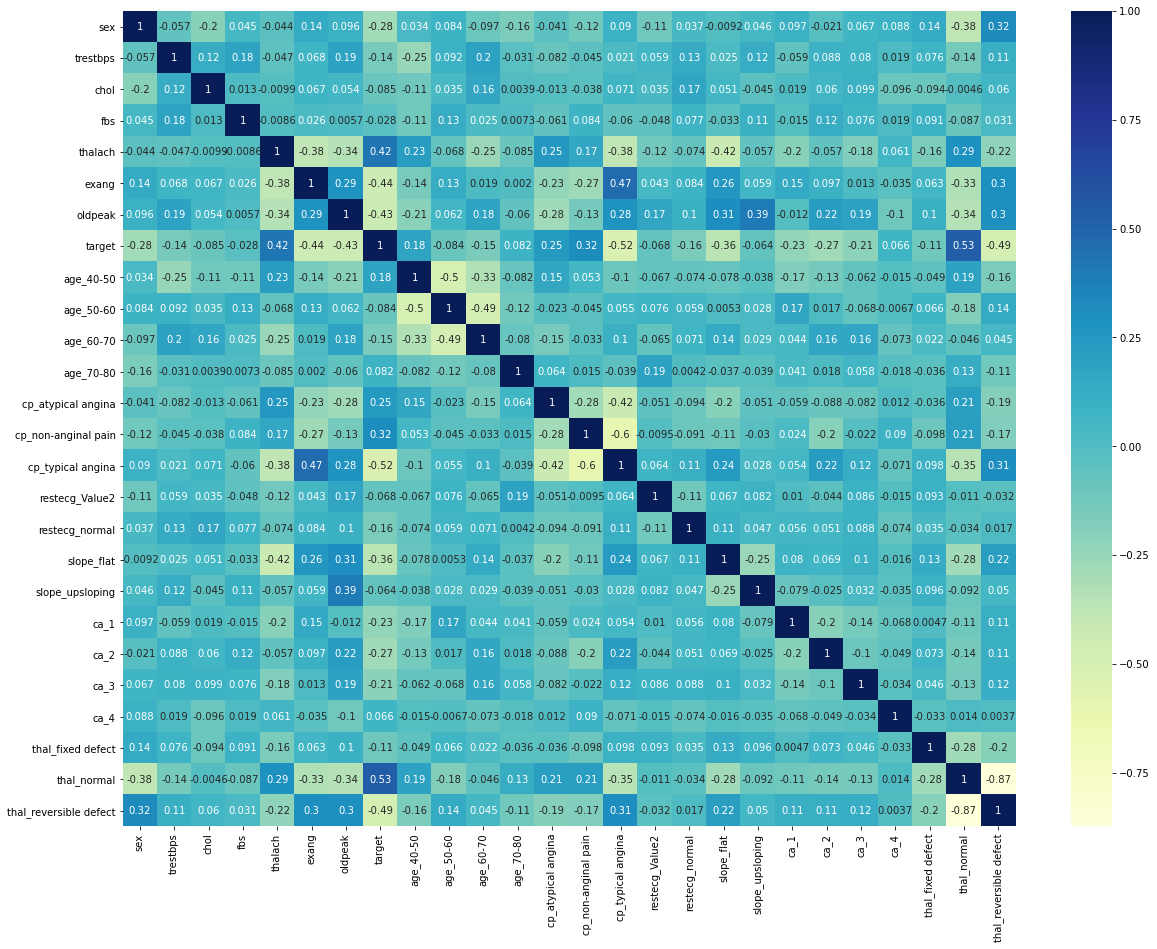

In [27]:
plt.figure(figsize=[20,15])
sns.heatmap(heart.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [28]:
# heart.corr().unstack().sort_values().drop_duplicates().head()

In [29]:
# heart.corr().unstack().sort_values().drop_duplicates().tail(10)

In [30]:
#removing highly correlated variables
X_train=X_train.drop('thal_normal',axis=1)
X_test=X_test.drop('thal_normal',axis=1)

In [31]:
# X_train.corr().unstack().sort_values().drop_duplicates().tail()

#### Model building 

In [32]:
#import Logistic Regression
from sklearn.linear_model import LogisticRegression

In [33]:
logreg=LogisticRegression()

#### Feature selection using RFE 

In [34]:
#import RFE
from sklearn.feature_selection import RFE

In [35]:
rfe=RFE(logreg,15)
rfe=rfe.fit(X_train, y_train)

In [36]:
#Ranking the features
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('sex', True, 1),
 ('trestbps', True, 1),
 ('chol', True, 1),
 ('fbs', False, 6),
 ('thalach', True, 1),
 ('exang', True, 1),
 ('oldpeak', True, 1),
 ('age_40-50', False, 9),
 ('age_50-60', False, 7),
 ('age_60-70', False, 5),
 ('age_70-80', False, 4),
 ('cp_atypical angina', True, 1),
 ('cp_non-anginal pain', True, 1),
 ('cp_typical angina', True, 1),
 ('restecg_Value2', False, 10),
 ('restecg_normal', False, 3),
 ('slope_flat', True, 1),
 ('slope_upsloping', True, 1),
 ('ca_1', True, 1),
 ('ca_2', True, 1),
 ('ca_3', True, 1),
 ('ca_4', False, 2),
 ('thal_fixed defect', False, 8),
 ('thal_reversible defect', True, 1)]

In [37]:
col=X_train.columns[rfe.support_]
X_train=X_train[col]

#### Manual elimination of features 

In [38]:
#statsmodel library is used to obtain the detailed summary of the model
#and elimination of features are done on the basis of p value ad VIF

#import statsmodel
import statsmodels.api as sm

In [39]:
#defining function for generalized linear model
def GLM_mod(X_train):
    X_train_sm=sm.add_constant(X_train)
    logm=sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
    res=logm.fit()
    return res

In [40]:
#Model1 summary
logm1=GLM_mod(X_train)
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  212
Model:                            GLM   Df Residuals:                      196
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -66.843
Date:                Wed, 24 Mar 2021   Deviance:                       133.69
Time:                        20:18:24   Pearson chi2:                     334.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.6339      1.736      3.246      0.001       2.232       9.036
sex                       -1.5432      0.621     -2.485      0.013      -2.760      -0.326
trestbps                  -0.6310      1.309     -0.482      0.630      -3.196       1.934
chol                      -1.9580      1.550     -1.264      0.206      -4.995       1.079
thalach                    1.4265      1.530      0.933      0.351      -1.571       4.424
exang                     -0.2744      0.532     -0.516      0.606      -1.317       0.768
oldpeak                   -2.9194      1.691     -1.727      0.084      -6.233       0.395
cp_atypical angina        -1.2290      0.844     -1.457      0.145      -2.882       0.424
cp_non-anginal pain        0.4882      0.813      0.601      0.548      -1.104       2.081
cp_typical angina         -1.9388      0.737     -2.630      0.009      -3.383      -0.494
slope_flat                -1.2245      0.549     -2.232      0.026      -2.300      -0.149
slope_upsloping           -0.8917      1.061     -0.840      0.401      -2.972       1.188
ca_1                      -2.6273      0.586     -4.481      0.000      -3.776      -1.478
ca_2                      -3.0468      0.833     -3.656      0.000      -4.680      -1.413
ca_3                      -3.5882      1.626     -2.207      0.027      -6.775      -0.401
thal_reversible defect    -1.7369      0.485     -3.581      0.000      -2.688      -0.786
==========================================================================================
"""

In [41]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
#defining function for VIF
def vif_table(X_train):
    vif=pd.DataFrame()
    X=X_train
    vif['Features']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    return vif

In [43]:
#VIF values
vif_table(X_train)

,Features,VIF
3,thalach,10.04
2,chol,6.79
1,trestbps,5.69
8,cp_typical angina,4.55
0,sex,3.59
5,oldpeak,3.29
7,cp_non-anginal pain,3.05
9,slope_flat,2.48
6,cp_atypical angina,2.30
14,thal_reversible defect,2.23


In [44]:
X_train.drop('trestbps',axis=1, inplace=True)

In [45]:
#Model 2
logm2=GLM_mod(X_train)
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  212
Model:                            GLM   Df Residuals:                      197
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -66.960
Date:                Wed, 24 Mar 2021   Deviance:                       133.92
Time:                        20:18:27   Pearson chi2:                     329.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.3706      1.628      3.299      0.001       2.179       8.562
sex                       -1.5316      0.619     -2.476      0.013      -2.744      -0.319
chol                      -2.0767      1.527     -1.360      0.174      -5.069       0.916
thalach                    1.4411      1.523      0.946      0.344      -1.544       4.426
exang                     -0.2581      0.529     -0.488      0.626      -1.296       0.779
oldpeak                   -2.9315      1.698     -1.727      0.084      -6.259       0.396
cp_atypical angina        -1.1536      0.826     -1.396      0.163      -2.773       0.466
cp_non-anginal pain        0.5922      0.786      0.753      0.451      -0.949       2.133
cp_typical angina         -1.8463      0.709     -2.604      0.009      -3.236      -0.457
slope_flat                -1.2191      0.549     -2.220      0.026      -2.296      -0.143
slope_upsloping           -0.9210      1.059     -0.870      0.384      -2.996       1.154
ca_1                      -2.6387      0.585     -4.508      0.000      -3.786      -1.491
ca_2                      -3.0719      0.832     -3.692      0.000      -4.703      -1.441
ca_3                      -3.6292      1.625     -2.233      0.026      -6.815      -0.444
thal_reversible defect    -1.7597      0.481     -3.656      0.000      -2.703      -0.816
==========================================================================================
"""

In [46]:
X_train.drop('exang',axis=1,inplace=True)

In [47]:
#Model 3
logm3=GLM_mod(X_train)
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  212
Model:                            GLM   Df Residuals:                      198
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -67.078
Date:                Wed, 24 Mar 2021   Deviance:                       134.16
Time:                        20:18:28   Pearson chi2:                     319.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.2345      1.595      3.281      0.001       2.107       8.362
sex                       -1.5069      0.613     -2.459      0.014      -2.708      -0.306
chol                      -2.0231      1.508     -1.341      0.180      -4.979       0.933
thalach                    1.5421      1.514      1.019      0.308      -1.425       4.509
oldpeak                   -3.0587      1.671     -1.831      0.067      -6.334       0.216
cp_atypical angina        -1.1384      0.826     -1.378      0.168      -2.758       0.481
cp_non-anginal pain        0.6071      0.790      0.768      0.442      -0.941       2.156
cp_typical angina         -1.9086      0.699     -2.731      0.006      -3.279      -0.539
slope_flat                -1.1950      0.545     -2.191      0.028      -2.264      -0.126
slope_upsloping           -0.8873      1.053     -0.843      0.399      -2.951       1.177
ca_1                      -2.6573      0.586     -4.537      0.000      -3.805      -1.509
ca_2                      -3.0320      0.824     -3.678      0.000      -4.648      -1.416
ca_3                      -3.6469      1.626     -2.243      0.025      -6.834      -0.460
thal_reversible defect    -1.7974      0.476     -3.772      0.000      -2.731      -0.863
==========================================================================================
"""

In [48]:
X_train.drop('cp_non-anginal pain',axis=1,inplace=True)

In [49]:
#Model 4
logm4=GLM_mod(X_train)
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  212
Model:                            GLM   Df Residuals:                      199
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -67.375
Date:                Wed, 24 Mar 2021   Deviance:                       134.75
Time:                        20:18:29   Pearson chi2:                     303.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.6386      1.521      3.706      0.000       2.657       8.620
sex                       -1.5668      0.606     -2.586      0.010      -2.754      -0.379
chol                      -1.9727      1.499     -1.316      0.188      -4.912       0.966
thalach                    1.4771      1.519      0.972      0.331      -1.500       4.454
oldpeak                   -3.1263      1.659     -1.885      0.059      -6.377       0.125
cp_atypical angina        -1.4945      0.692     -2.159      0.031      -2.851      -0.138
cp_typical angina         -2.2424      0.558     -4.018      0.000      -3.336      -1.149
slope_flat                -1.2263      0.545     -2.251      0.024      -2.294      -0.159
slope_upsloping           -0.9074      1.054     -0.861      0.389      -2.973       1.158
ca_1                      -2.5633      0.566     -4.527      0.000      -3.673      -1.454
ca_2                      -3.0766      0.825     -3.728      0.000      -4.694      -1.459
ca_3                      -3.4551      1.562     -2.212      0.027      -6.516      -0.394
thal_reversible defect    -1.7876      0.476     -3.755      0.000      -2.721      -0.854
==========================================================================================
"""

In [50]:
X_train.drop('slope_upsloping',axis=1,inplace=True)

In [51]:
#Model 5
logm5=GLM_mod(X_train)
logm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  212
Model:                            GLM   Df Residuals:                      200
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -67.744
Date:                Wed, 24 Mar 2021   Deviance:                       135.49
Time:                        20:18:30   Pearson chi2:                     290.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.4817      1.506      3.641      0.000       2.531       8.432
sex                       -1.5336      0.601     -2.550      0.011      -2.712      -0.355
chol                      -1.8978      1.486     -1.277      0.202      -4.810       1.015
thalach                    1.5398      1.510      1.020      0.308      -1.419       4.499
oldpeak                   -3.8063      1.453     -2.619      0.009      -6.655      -0.958
cp_atypical angina        -1.5093      0.691     -2.184      0.029      -2.864      -0.155
cp_typical angina         -2.2415      0.557     -4.027      0.000      -3.332      -1.151
slope_flat                -1.0392      0.494     -2.103      0.035      -2.008      -0.071
ca_1                      -2.5409      0.566     -4.492      0.000      -3.649      -1.432
ca_2                      -2.9763      0.812     -3.667      0.000      -4.567      -1.386
ca_3                      -3.4039      1.564     -2.177      0.029      -6.468      -0.339
thal_reversible defect    -1.7965      0.477     -3.767      0.000      -2.731      -0.862
==========================================================================================
"""

In [52]:
X_train.drop('thalach',axis=1,inplace=True)

In [53]:
#Model 6
logm6=GLM_mod(X_train)
logm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  212
Model:                            GLM   Df Residuals:                      201
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -68.277
Date:                Wed, 24 Mar 2021   Deviance:                       136.55
Time:                        20:18:32   Pearson chi2:                     299.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6.4617      1.183      5.462      0.000       4.143       8.781
sex                       -1.4577      0.588     -2.477      0.013      -2.611      -0.304
chol                      -1.7317      1.461     -1.186      0.236      -4.594       1.131
oldpeak                   -3.9883      1.445     -2.760      0.006      -6.820      -1.156
cp_atypical angina        -1.5163      0.689     -2.199      0.028      -2.868      -0.165
cp_typical angina         -2.3768      0.542     -4.386      0.000      -3.439      -1.315
slope_flat                -1.1515      0.479     -2.403      0.016      -2.091      -0.212
ca_1                      -2.6070      0.561     -4.651      0.000      -3.706      -1.508
ca_2                      -2.9246      0.806     -3.628      0.000      -4.505      -1.345
ca_3                      -3.4020      1.524     -2.233      0.026      -6.389      -0.415
thal_reversible defect    -1.8313      0.476     -3.846      0.000      -2.765      -0.898
==========================================================================================
"""

In [54]:
X_train.drop('chol',axis=1,inplace=True)

In [55]:
#Model 7
logm7=GLM_mod(X_train)
logm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  212
Model:                            GLM   Df Residuals:                      202
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -68.981
Date:                Wed, 24 Mar 2021   Deviance:                       137.96
Time:                        20:18:32   Pearson chi2:                     311.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.6351      0.899      6.270      0.000       3.874       7.397
sex                       -1.3066      0.564     -2.317      0.020      -2.412      -0.202
oldpeak                   -4.0037      1.437     -2.785      0.005      -6.821      -1.186
cp_atypical angina        -1.4979      0.687     -2.179      0.029      -2.845      -0.151
cp_typical angina         -2.3506      0.537     -4.381      0.000      -3.402      -1.299
slope_flat                -1.1491      0.478     -2.406      0.016      -2.085      -0.213
ca_1                      -2.6204      0.558     -4.699      0.000      -3.713      -1.527
ca_2                      -2.8971      0.802     -3.613      0.000      -4.469      -1.325
ca_3                      -3.5126      1.505     -2.334      0.020      -6.462      -0.563
thal_reversible defect    -1.8416      0.474     -3.884      0.000      -2.771      -0.912
==========================================================================================
"""

In [56]:
vif_table(X_train)

,Features,VIF
0,sex,2.66
1,oldpeak,2.20
8,thal_reversible defect,2.16
3,cp_typical angina,2.15
4,slope_flat,1.98
5,ca_1,1.44
6,ca_2,1.30
2,cp_atypical angina,1.22
7,ca_3,1.15


#### Probability Prediction 

In [57]:
y_train_pred = logm7.predict(sm.add_constant(X_train))

In [58]:
y_train_pred[:10]

3      0.910027
162    0.944306
112    0.975019
278    0.775577
209    0.076981
126    0.871392
47     0.986985
96     0.795837
98     0.618038
123    0.996442
dtype: float64

In [59]:
#Reshaping the array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.9100271 , 0.9443057 , 0.9750187 , 0.77557709, 0.07698138,
       0.87139172, 0.98698459, 0.79583744, 0.61803751, 0.99644241])

In [60]:
#Create a Data Frame with 'Converted' Column and Conversion Probability based on our final model
y_train_pred_final = pd.DataFrame({'Target':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Target,Conversion_Prob
0,1,0.910027
1,1,0.944306
2,1,0.975019
3,0,0.775577
4,0,0.076981


In [61]:
#Predicting the Conversion based on the probability
# probability value greater than 0.5 is chosen to assign a positive lead conversion
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Target,Conversion_Prob,Predicted
0,1,0.910027,1
1,1,0.944306,1
2,1,0.975019,1
3,0,0.775577,1
4,0,0.076981,0


#### Confusion Matrix 

In [62]:
from sklearn import metrics

In [63]:
confusion = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final.Predicted )
print(confusion)

[[ 73  19]
 [ 10 110]]


In [64]:
print(metrics.accuracy_score(y_train_pred_final.Target, y_train_pred_final.Predicted))

0.8632075471698113


In [65]:
TN = confusion[0,0] # True Negatives
FP = confusion[0,1] # False Positives
FN = confusion[1,0] # False Negatives
TP = confusion[1,1] # True Positive 


In [66]:
#Sensitivity
TP/(TP+FN)

0.9166666666666666

In [67]:
#Specificity
TN/(TN+FP)

0.7934782608695652

In [68]:
#defining function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [69]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Target, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

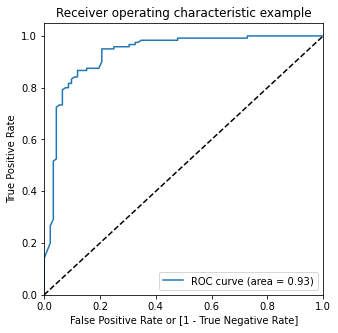

In [70]:
#plot
draw_roc(y_train_pred_final.Target, y_train_pred_final.Conversion_Prob)

In [71]:
# probabilty from 0.0 to 0.9
numbers = [float(x)/10 for x in range(10)]
#mapping the prediction based on the probability values
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
#head
y_train_pred_final.head()

,Target,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.910027,1,1,1,1,1,1,1,1,1,1,1
1,1,0.944306,1,1,1,1,1,1,1,1,1,1,1
2,1,0.975019,1,1,1,1,1,1,1,1,1,1,1
3,0,0.775577,1,1,1,1,1,1,1,1,1,0,0
4,0,0.076981,0,1,0,0,0,0,0,0,0,0,0


In [72]:
#Accuracy, Sensitivity and Specificity
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.566038  1.000000  0.000000
0.1   0.1  0.773585  0.991667  0.489130
0.2   0.2  0.839623  0.983333  0.652174
0.3   0.3  0.849057  0.966667  0.695652
0.4   0.4  0.863208  0.950000  0.750000
0.5   0.5  0.863208  0.916667  0.793478
0.6   0.6  0.872642  0.866667  0.880435
0.7   0.7  0.849057  0.800000  0.913043
0.8   0.8  0.816038  0.708333  0.956522
0.9   0.9  0.702830  0.500000  0.967391


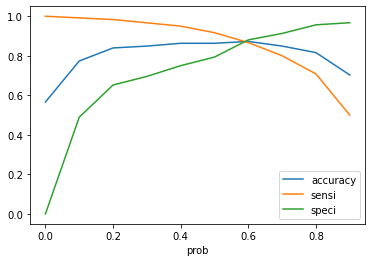

In [74]:
#Plotting Accuracy, Sensitivity and Specificity
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi','speci'])
plt.show()

In [75]:
#Final prediction with 0.60 as Cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.60 else 0)

y_train_pred_final.head()

,Target,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.910027,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.944306,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.975019,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.775577,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.076981,0,1,0,0,0,0,0,0,0,0,0,0


In [76]:
#Accuracy
metrics.accuracy_score(y_train_pred_final.Target, y_train_pred_final.final_predicted)

0.8726415094339622

In [77]:
#Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final.final_predicted )
confusion2

array([[ 81,  11],
       [ 16, 104]], dtype=int64)

In [78]:
TN = confusion2[0,0] # True Negatives
FP = confusion2[0,1] # False Positives
FN = confusion2[1,0] # False Negatives
TP = confusion2[1,1] # True Positive 

In [79]:
# Calculate Sensitivity

TP/(TP+FN)

0.8666666666666667

In [80]:
# Calculate Specificity
TN/(TN+FP)

0.8804347826086957

### Test Data Predictions 

In [81]:
#Scaling the test data
X_test[['trestbps','chol','thalach','oldpeak']]= scaler.transform(X_test[['trestbps','chol','thalach','oldpeak']])

In [82]:
X_test = X_test[col]
X_test.head()

,sex,trestbps,chol,thalach,exang,oldpeak,cp_atypical angina,cp_non-anginal pain,cp_typical angina,slope_flat,slope_upsloping,ca_1,ca_2,ca_3,thal_reversible defect
69,0,0.306122,0.272727,0.702290,0,0.000000,0,0,1,0,0,0,0,0,0
300,1,0.510204,0.216783,0.534351,0,0.548387,0,0,1,1,0,0,1,0,1
220,0,0.571429,0.965035,0.633588,0,0.645161,0,0,1,1,0,0,0,1,1
134,0,0.326531,0.611888,0.702290,0,0.000000,1,0,0,0,0,0,0,0,0
7,1,0.265306,0.461538,0.778626,0,0.000000,1,0,0,0,0,0,0,0,1


In [83]:
#Add constant
X_test_sm = sm.add_constant(X_test[col])

In [84]:
#Dropping the features removed during feature selection 
X_test.drop(['trestbps','exang','cp_non-anginal pain', 'slope_upsloping','thalach','chol'], 1, inplace = True)

In [85]:
y_test_pred = logm7.predict(sm.add_constant(X_test))

In [86]:
y_test_pred[:10]

69     0.963893
300    0.002226
220    0.003013
134    0.984283
7      0.728879
291    0.012419
97     0.031040
242    0.033576
18     0.732875
283    0.534014
dtype: float64

In [87]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [88]:
y_pred_final.head()

,target,0
0,1,0.963893
1,0,0.002226
2,0,0.003013
3,1,0.984283
4,1,0.728879


In [89]:
#renaming column
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [90]:
y_pred_final.head()

,target,Conversion_Prob
0,1,0.963893
1,0,0.002226
2,0,0.003013
3,1,0.984283
4,1,0.728879


In [91]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.60 else 0)

In [92]:
y_pred_final.head()

,target,Conversion_Prob,final_predicted
0,1,0.963893,1
1,0,0.002226,0
2,0,0.003013,0
3,1,0.984283,1
4,1,0.728879,1


In [93]:
confusion3 = metrics.confusion_matrix(y_pred_final['target'], y_pred_final.final_predicted )
confusion3

array([[41,  5],
       [ 4, 41]], dtype=int64)

In [94]:
#Accuracy
metrics.accuracy_score(y_pred_final['target'], y_pred_final.final_predicted)

0.9010989010989011

In [95]:
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
TP = confusion2[1,1] # true positive 

In [96]:
# Sensitivity
TP / float(TP+FN)

0.8666666666666667

In [97]:
# Calculate specificity
TN / float(TN+FP)

0.8804347826086957

In [98]:
logm7.params

const                     5.635109
sex                      -1.306588
oldpeak                  -4.003698
cp_atypical angina       -1.497948
cp_typical angina        -2.350624
slope_flat               -1.149097
ca_1                     -2.620354
ca_2                     -2.897085
ca_3                     -3.512633
thal_reversible defect   -1.841628
dtype: float64